1/1 [==============================] - 0s 194ms/step


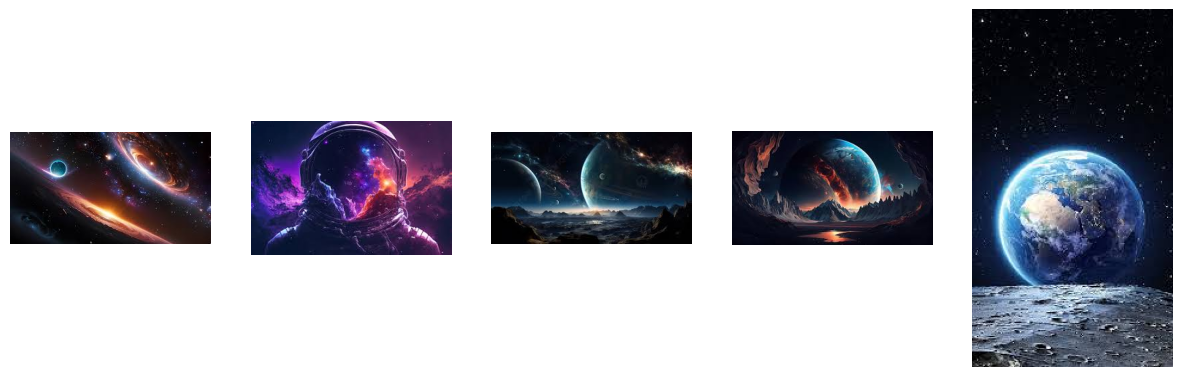

In [9]:
!pip install tensorflow annoy numpy matplotlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from annoy import AnnoyIndex
import os

# Method to load image and preprocess it
def load_and_preprocess_image(img_path):
  img = keras_image.load_img(img_path, target_size=(224, 224))
  img_array = keras_image.img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)
  return preprocess_input(img_array_expanded)

# Method to extract features of image
def extract_features(image_path, model):
  img = load_and_preprocess_image(image_path)
  features = model.predict(img)
  return features.flatten()

# Method to create and populate the Annoy(Approximate Nearest Neighbors Oh Yeah) Index
def build_index(image_paths, model, n_trees=10):
  dimension = model.output_shape[-1]
  index = AnnoyIndex(dimension, metric='angular')

  for i, path in enumerate(image_paths):
    features = extract_features(path, model)
    index.add_item(i, features)

  index.build(n_trees)
  return index

# Method to find the first "n_similar" most similar images
def find_similar_images(input_image_path, index, image_paths, model, n_similar=5):
  features = extract_features(input_image_path, model)
  similar_ids = index.get_nns_by_vector(features, n_similar)

  plt.figure(figsize=(15, 10))
  for i, idx in enumerate(similar_ids):
    plt.subplot(1, len(similar_ids), i + 1)
    img = plt.imread(image_paths[idx])
    plt.imshow(img)
    plt.axis('off')
  plt.show()

### Testing
# Initialize the model(a pre-trained model called ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

image_directory = './images_db'
image_paths = [os.path.join(image_directory, fname) for fname in os.listdir(image_directory)]
annoy_index = build_index(image_paths, base_model)

# Test with an input image
test_image_path = './space.jpg'
find_similar_images(test_image_path, annoy_index, image_paths, base_model)